In [24]:
import pandas as pd
import numpy as np

In [25]:
parking = pd.read_csv("../../Data/상관분석/주차면수.csv")
car = pd.read_csv("../../Data/상관분석/구별차량등록대수.csv")
trans= pd.read_csv("../../Data/상관분석/대중교통이용량.csv")
area= pd.read_csv("../../Data/상관분석/면적.csv", header=1)
service= pd.read_csv("../../Data/상관분석/서비스업.csv", header=1)
pop= pd.read_csv("../../Data/상관분석/인구.csv", header=1)
move= pd.read_csv("../../Data/상관분석/평균유동인구.csv")
work= pd.read_csv("../../Data/상관분석/평균직장인구.csv")
per= pd.read_csv('../../Data/상관분석/차량대비면수.csv')
ground= pd.read_csv('../../Data/상관분석/토지현황.csv', header=1)
ground

,자치구별(1),자치구별(2),합계,임야,대지,주차장,도로
0,합계,소계,605208148.6,137415854.7,222883593.6,1254136.6,80504986.7
1,합계,종로구,23913161.7,9359338.5,8195547.1,22566.6,2386821.6
2,합계,중구,9960286.5,1285766.0,5206210.3,32782.6,2138672.5
3,합계,용산구,21867609.5,1602504.0,10083253.0,18683.2,2515915.2
4,합계,성동구,16820272.0,257414.2,6242263.6,10337.9,2277876.9
5,합계,광진구,17062836.8,2473129.4,7010318.0,19762.1,2503051.0
6,합계,동대문구,14216010.8,730118.0,7801183.5,7787.9,2632895.8
7,합계,중랑구,18497097.2,2514829.6,7264669.4,96059.0,2875447.8
8,합계,성북구,24577897.3,8090984.2,10220192.5,10964.2,2736267.2
9,합계,강북구,23600401.9,12519026.3,6678073.0,28025.1,1998963.7


In [26]:
ground= ground.rename(columns={'자치구별(2)':'구별'})[['구별','대지']]
# ground= ground.drop(0)
ground

,구별,대지
0,소계,222883593.6
1,종로구,8195547.1
2,중구,5206210.3
3,용산구,10083253.0
4,성동구,6242263.6
5,광진구,7010318.0
6,동대문구,7801183.5
7,중랑구,7264669.4
8,성북구,10220192.5
9,강북구,6678073.0


In [27]:
parking= parking.rename(columns={'시군구':'구별','합계면수':'주차장면수'}).sort_values('구별')[['구별','주차장면수']]
parking

,구별,주차장면수
0,강남구,413898
1,강동구,209959
2,강북구,96636
3,강서구,315812
4,관악구,153960
5,광진구,134389
6,구로구,191823
7,금천구,139148
8,노원구,178194
9,도봉구,110933


In [28]:
car= car.rename(columns={'시군구':'구별','계':'차량등록대수'})
car
# per= pd.merge(parking, car, on='구별')
# per


,구별,차량등록대수
0,강남구,245487
1,강동구,151959
2,강북구,75122
3,강서구,206522
4,관악구,118273
5,광진구,99115
6,구로구,146038
7,금천구,90501
8,노원구,152375
9,도봉구,95608


In [29]:
trans= trans.rename(columns={'대중교통 총이용량':'대중교통'})
trans

,구별,대중교통
0,강남구,40046.904762
1,강동구,21299.142857
2,강북구,46589.666667
3,강서구,28185.222222
4,관악구,62545.250000
5,광진구,34377.636364
6,구로구,35528.125000
7,금천구,52207.000000
8,노원구,25790.384615
9,도봉구,35366.000000


In [30]:
area= area.rename(columns={'동별(2)':'구별'})[['구별','면적 (㎢)']]
area.sort_values('면적 (㎢)')

,구별,면적 (㎢)
1,중구,9.96
17,금천구,13.02
5,동대문구,14.22
19,동작구,16.35
3,성동구,16.86
4,광진구,17.06
14,양천구,17.41
12,서대문구,17.63
6,중랑구,18.50
16,구로구,20.12


In [31]:
service= service.rename(columns={'자치구별(1)':'구별', '전체':'서비스'})[['구별','서비스']]
service= service.drop(0)
service

,구별,서비스
1,종로구,21844
2,중구,34303
3,용산구,18938
4,성동구,19354
5,광진구,21770
6,동대문구,23153
7,중랑구,18835
8,성북구,20599
9,강북구,15601
10,도봉구,14198


In [32]:
pop= pop.rename(columns={'동별(2)':'구별'})[['구별','인구 (명)']]
pop

,구별,인구 (명)
0,종로구,158996
1,중구,134635
2,용산구,244645
3,성동구,300505
4,광진구,360109
5,동대문구,357014
6,중랑구,399562
7,성북구,447056
8,강북구,311569
9,도봉구,327361


In [33]:
move= move.rename(columns={'gu':'구별','평균유동인구':'유동인구'})[['구별','유동인구']]
move

,구별,유동인구
0,종로구,20622.666667
1,중구,47538.666667
2,용산구,26918.000000
3,성동구,40318.166667
4,광진구,53250.333333
5,동대문구,68638.500000
6,중랑구,53818.000000
7,성북구,44333.333333
8,강북구,36604.666667
9,도봉구,30311.500000


In [34]:
work= work.rename(columns={'gu':'구별','평균직장인구':'직장인구'})[['구별','직장인구']]
work

,구별,직장인구
0,종로구,99.0
1,중구,336.0
2,용산구,83.0
3,성동구,49.0
4,광진구,46.0
5,동대문구,55.0
6,중랑구,22.0
7,성북구,45.0
8,강북구,12.0
9,도봉구,17.0


In [35]:
per= per.rename(columns={'시군구':'구별'})[['구별','차량대비면수']]
per

,구별,차량대비면수
0,강남구,168.602818
1,강동구,138.168190
2,강북구,128.638748
3,강서구,152.919302
4,관악구,130.173412
5,광진구,135.588962
6,구로구,131.351429
7,금천구,153.752997
8,노원구,116.944381
9,도봉구,116.028993


In [36]:
merge=pd.merge(parking, car, on='구별')

In [37]:
merge=pd.merge(parking, car, on='구별').merge(trans, on='구별').merge(ground, on='구별').merge(move, on='구별').merge(work, on='구별').merge(pop, on='구별')
merge= merge.set_index('구별')
merge

,주차장면수,차량등록대수,대중교통,대지,유동인구,직장인구,인구 (명)
구별,,,,,,,
강남구,413898,245487,40046.904762,16317506.0,35741.666667,293.0,544055
강동구,209959,151959,21299.142857,9003466.5,45264.666667,29.0,463998
강북구,96636,75122,46589.666667,6678073.0,36604.666667,12.0,311569
강서구,315812,206522,28185.222222,11945459.9,27433.666667,35.0,585901
관악구,153960,118273,62545.250000,8211311.7,44154.000000,25.0,509803
광진구,134389,99115,34377.636364,7010318.0,53250.333333,46.0,360109
구로구,191823,146038,35528.125000,8523716.3,36924.333333,70.0,432488
금천구,139148,90501,52207.000000,5066303.9,31379.333333,100.0,247835
노원구,178194,152375,25790.384615,9356017.3,27103.500000,16.0,527032


<AxesSubplot:title={'center':'주차장면수와 상관관계 분석'}>

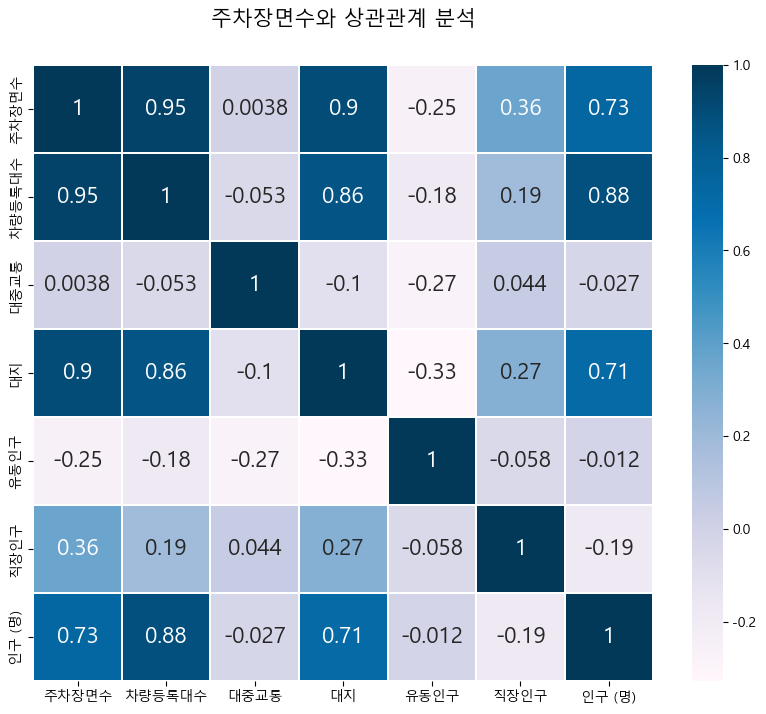

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(10, 8))
plt.title("주차장면수와 상관관계 분석", y = 1.05, size = 15)
sns.heatmap(merge.astype(float).corr(), cmap=plt.cm.PuBu, linewidths = 0.1,
            annot = True,annot_kws = {"size" : 16})

면적 

    주차장면수: 차량등록대수(0.95), 서비스(0.88), 면적(0.77)
    차량등록대수: 인구(0.88), 서비스(0.77),면적(0.73)

대지 포함
       
 ### 주차장면수: 차량등록대수(0.95), 대지(0.9), 서비스(0.88), 인구(0.73)
    차량등록대수: 인구(0.88), 대지(0.86), 서비스(0.77)

서비스 제외
##    주차장면수: 차량등록대수(0.95), 대지(0.9), 인구(0.73)

In [39]:
merge2= merge[['차량등록대수','대지','인구 (명)']]
# merge2['합계']= merge['차량등록대수']*0.95 + merge['대지']*0.9 +merge['서비스']*0.88 +merge['인구 (명)']*0.73
# merge2.sort_values('합계')

In [40]:
merge2.info()
merge2

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   차량등록대수  25 non-null     int64  
 1   대지      25 non-null     float64
 2   인구 (명)  25 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 800.0+ bytes


,차량등록대수,대지,인구 (명)
구별,,,
강남구,245487,16317506.0,544055
강동구,151959,9003466.5,463998
강북구,75122,6678073.0,311569
강서구,206522,11945459.9,585901
관악구,118273,8211311.7,509803
광진구,99115,7010318.0,360109
구로구,146038,8523716.3,432488
금천구,90501,5066303.9,247835
노원구,152375,9356017.3,527032


In [41]:
merge3= merge[['인구 (명)', '대지', '차량등록대수']]
merge3

,인구 (명),대지,차량등록대수
구별,,,
강남구,544055,16317506.0,245487
강동구,463998,9003466.5,151959
강북구,311569,6678073.0,75122
강서구,585901,11945459.9,206522
관악구,509803,8211311.7,118273
광진구,360109,7010318.0,99115
구로구,432488,8523716.3,146038
금천구,247835,5066303.9,90501
노원구,527032,9356017.3,152375


In [46]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
data=merge3[['인구 (명)', '대지', '차량등록대수']]
scaler.fit(data)
merge3[['인구 (명)', '대지', '차량등록대수']]= scaler.transform(data)

C:\Users\acorn\AppData\Local\Temp\ipykernel_45772\756519484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge3[['인구 (명)', '대지', '차량등록대수']]= scaler.transform(data)


In [47]:
merge3['합계']= merge3['차량등록대수']*0.95 + merge3['대지']*0.9 +merge3['인구 (명)']*0.73
merge3['주차장면수']= merge['주차장면수']
merge3.sort_values('합계')

C:\Users\acorn\AppData\Local\Temp\ipykernel_45772\1481186121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge3['합계']= merge3['차량등록대수']*0.95 + merge3['대지']*0.9 +merge3['인구 (명)']*0.73
C:\Users\acorn\AppData\Local\Temp\ipykernel_45772\1481186121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge3['주차장면수']= merge['주차장면수']


,인구 (명),대지,차량등록대수,합계,주차장면수
구별,,,,,
중구,0.000000,0.012435,0.045280,0.054207,109153
종로구,0.045172,0.278125,0.000000,0.283288,92062
금천구,0.209905,0.000000,0.200227,0.343446,139148
강북구,0.328086,0.143253,0.122751,0.485044,96636
도봉구,0.357369,0.097753,0.225955,0.563514,110933
성동구,0.307570,0.104519,0.278413,0.583086,134544
서대문구,0.349194,0.186727,0.195395,0.608591,132942
용산구,0.203990,0.445903,0.123315,0.667375,118632
광진구,0.418093,0.172783,0.243622,0.692154,134389


In [44]:
merge2.sort_values('차량등록대수')

,차량등록대수,대지,인구 (명)
구별,,,
종로구,50756,8195547.1,158996
중구,59744,5206210.3,134635
강북구,75122,6678073.0,311569
용산구,75234,10083253.0,244645
서대문구,89542,7167203.1,322952
금천구,90501,5066303.9,247835
도봉구,95608,6166143.6,327361
동대문구,98603,7801183.5,357014
광진구,99115,7010318.0,360109


In [48]:
merge3.sort_values('주차장면수')

,인구 (명),대지,차량등록대수,합계,주차장면수
구별,,,,,
종로구,0.045172,0.278125,0.000000,0.283288,92062
강북구,0.328086,0.143253,0.122751,0.485044,96636
중구,0.000000,0.012435,0.045280,0.054207,109153
도봉구,0.357369,0.097753,0.225955,0.563514,110933
용산구,0.203990,0.445903,0.123315,0.667375,118632
중랑구,0.491251,0.195389,0.324146,0.842402,132884
서대문구,0.349194,0.186727,0.195395,0.608591,132942
광진구,0.418093,0.172783,0.243622,0.692154,134389
성동구,0.307570,0.104519,0.278413,0.583086,134544


In [52]:
merge.sort_values('대지')

,주차장면수,차량등록대수,대중교통,대지,유동인구,직장인구,인구 (명)
구별,,,,,,,
금천구,139148,90501,52207.000000,5066303.9,31379.333333,100.0,247835
중구,109153,59744,25475.150000,5206210.3,47538.666667,336.0,134635
도봉구,110933,95608,35366.000000,6166143.6,30311.500000,17.0,327361
성동구,134544,106021,22429.928571,6242263.6,40318.166667,49.0,300505
강북구,96636,75122,46589.666667,6678073.0,36604.666667,12.0,311569
광진구,134389,99115,34377.636364,7010318.0,53250.333333,46.0,360109
서대문구,132942,89542,16519.400000,7167203.1,52607.166667,38.0,322952
중랑구,132884,115099,19096.750000,7264669.4,53818.000000,22.0,399562
동대문구,148103,98603,22703.666667,7801183.5,68638.500000,55.0,357014
